## Check the Working Directory

In [1]:
import os
os.getcwd()

'/home/osave/1402SJL-ai-accelerated-spark'

## Enhanced Document Loading System

This cell implements an enhanced document loading system that combines web content with local files to create a comprehensive knowledge base. The system loads documents from multiple sources and adds appropriate metadata for citation tracking.

**Key Features:**
- Loads URLs from CSV file with recursive depth
- Supports both Jupyter notebooks (.ipynb) and Python files (.py)
- Adds source type metadata for proper citation handling
- Provides detailed loading progress and statistics

In [2]:
import pandas as pd
import os
import gc
import shutil
import glob
from langchain.document_loaders import RecursiveUrlLoader
from langchain_community.document_loaders import NotebookLoader, TextLoader
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

# =============================================================================
# STEP 1: ENHANCED DOCUMENT LOADING (REPLACES YOUR ORIGINAL LOADING)
# =============================================================================

print("="*60)
print("ENHANCED DOCUMENT LOADING")
print("="*60)

# Read URLs from CSV file
df = pd.read_csv('gpu_data_science_urls.txt')
base_urls = df['url'].dropna().tolist()

print(f"Found {len(base_urls)} URLs to load")

# Step 1: Load all web pages with recursive depth 2
documents = []
for url in base_urls:
    try:
        loader = RecursiveUrlLoader(url=url, max_depth=2,extractor=bs4_extractor)
        docs = loader.load()
        
        # Add source type metadata for URL documents
        for doc in docs:
            doc.metadata['source_type'] = 'url'
        
        documents.extend(docs)
        print(f"✓ Loaded: {url}")
    except Exception as e:
        print(f"✗ Failed: {url} - {e}")

print(f"URL documents loaded: {len(documents)}")

# Step 2: Load notebooks and Python files from folder
notebook_folder_path = 'resource/'  # CHANGE THIS TO YOUR FOLDER PATH

if os.path.exists(notebook_folder_path):
    print(f"\nLoading files from: {notebook_folder_path}")
    
    # Find all .ipynb and .py files in the folder
    notebook_files = glob.glob(os.path.join(notebook_folder_path, "**/*.ipynb"), recursive=True)
    python_files = glob.glob(os.path.join(notebook_folder_path, "**/*.py"), recursive=True)
    all_files = notebook_files + python_files
    
    print(f"Found {len(notebook_files)} notebook files and {len(python_files)} Python files")
    
    for file_path in all_files:
        try:
            # Choose loader based on file extension
            if file_path.endswith('.ipynb'):
                loader = NotebookLoader(
                    path=file_path,
                    include_outputs=True,
                    max_output_length=1000,
                    remove_newline=True,
                )
            else:  # .py files
                loader = TextLoader(file_path)
            
            docs = loader.load()
            
            # Add custom metadata for both notebooks and Python files
            for doc in docs:
                relative_path = os.path.relpath(file_path, notebook_folder_path)
                
                if file_path.endswith('.ipynb'):
                    source_type = 'notebook'
                else:
                    source_type = 'python_file'
                
                doc.metadata.update({
                    'source_type': source_type,
                    'source': relative_path,  # This will be folder/filename
                    'full_path': file_path,
                    'filename': os.path.basename(file_path)
                })
            
            documents.extend(docs)
            print(f"✓ Loaded: {relative_path}")
            
        except Exception as e:
            print(f"✗ Failed to load {file_path}: {e}")
    
    notebook_count = len([d for d in documents if d.metadata.get('source_type') == 'notebook'])
    python_count = len([d for d in documents if d.metadata.get('source_type') == 'python_file'])
    print(f"Notebook documents loaded: {notebook_count}")
    print(f"Python file documents loaded: {python_count}")
else:
    print(f"⚠️  Files folder not found: {notebook_folder_path}")

print(f"\nTotal documents loaded: {len(documents)}")
print("Step 1 complete - enhanced loading done!")

ENHANCED DOCUMENT LOADING
Found 108 URLs to load
✓ Loaded: https://github.com/rapidsai/cuml
✓ Loaded: https://docs.rapids.ai/api/cuml/stable/
✓ Loaded: https://github.com/rapidsai/cudf
✓ Loaded: https://www.exxactcorp.com/blog/Deep-Learning/nvidia-rapids-tutorial
✓ Loaded: https://colab.google/articles/cudf
✓ Loaded: https://developer.nvidia.com/blog/nvidia-cuml-brings-zero-code-change-acceleration-to-scikit-learn/
✓ Loaded: https://stackoverflow.com/questions/60188071/installing-cudf-cuml-into-colab-with-rapids-ai-version-0-11


/packages/envs/genai25.07/lib/python3.12/site-packages/langchain_community/document_loaders/recursive_url_loader.py:43: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(raw_html, "html.parser")


✓ Loaded: https://inside-machinelearning.com/en/cuml-tutorial-colab/
✓ Loaded: https://www.analyticsvidhya.com/blog/2022/01/cuml-blazing-fast-machine-learning-model-training-with-nvidias-rapids/
✓ Loaded: https://rapids.ai/
✓ Loaded: https://github.com/rapidsai/cugraph
✓ Loaded: https://docs.rapids.ai/api/cugraph/stable/
✓ Loaded: https://github.com/rapidsai/cugraph/issues/1200
✓ Loaded: https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/conv/cugraph/gat_conv.html
✓ Loaded: https://github.com/rapidsai/cuspatial
✓ Loaded: https://docs.rapids.ai/api/cuspatial/stable/user_guide/cuspatial_api_examples/
✓ Loaded: https://docs.rapids.ai/user-guide/
✓ Loaded: https://docs.rapids.ai/api/cuspatial/stable/
✓ Loaded: https://pypi.org/project/cuspatial-cu11/
✓ Loaded: https://learning.rc.virginia.edu/notes/rapids/
✓ Loaded: https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html
✓ Loaded: https://docs.pytorch.org/tutorials/
✓ Loaded: https://docs.pytorch.

## Enhanced Document Chunking System

This cell implements an intelligent document chunking system that cleans, filters, and optimizes text chunks for better vector store performance. The system includes content quality filtering and adaptive chunk sizing based on document characteristics.

**Key Components:**
- HTML content cleaning with BeautifulSoup
- Quality filtering to remove navigation and boilerplate text
- Adaptive chunk size optimization based on document length analysis
- Technical content-aware text splitting with code block preservation
- Batch processing for memory efficiency
- Fallback mechanism for error handling

In [3]:
import re
from bs4 import BeautifulSoup, XMLParsedAsHTMLWarning
from langchain.text_splitter import RecursiveCharacterTextSplitter
from typing import List
import gc
import warnings

warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)
def clean_content(text: str) -> str:
    """
    Clean document content by removing HTML, excessive whitespace, and noise
    
    Args:
        text (str): Raw document content
        
    Returns:
        str: Cleaned content
    """
    if not text or len(text.strip()) == 0:
        return ""
    
    try:
        # Remove HTML tags using BeautifulSoup
        soup = BeautifulSoup(text, 'html.parser')
        
        # Remove script and style elements completely
        for script in soup(["script", "style", "nav", "footer", "header"]):
            script.decompose()
        
        # Extract text
        text = soup.get_text()
        
        # Clean up whitespace and special characters
        text = re.sub(r'\s+', ' ', text)  # Multiple whitespace to single space
        text = re.sub(r'\n\s*\n', '\n', text)  # Multiple newlines to single
        # # Just remove actual problematic characters
        # text = re.sub(r'[\x00-\x08\x0B\x0C\x0E-\x1F\x7F]', ' ', text)  # Control chars only
        text = re.sub(r'(.)\1{3,}', r'\1\1', text)
        
        # Remove URLs (optional - might want to keep some)
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        
        # Clean up and strip
        text = text.strip()
        
        return text
        
    except Exception as e:
        print(f"Warning: Content cleaning failed: {e}")
        # Fallback: basic cleaning
        text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
        text = re.sub(r'\s+', ' ', text).strip()
        return text

def filter_quality_content(text: str, min_length: int = 50) -> bool:
    """
    Filter out low-quality content chunks
    
    Args:
        text (str): Content to evaluate
        min_length (int): Minimum character length
        
    Returns:
        bool: True if content meets quality criteria
    """
    if len(text) < min_length:
        return False
    
    # Check for meaningful content (not just navigation/metadata)
    low_quality_indicators = [
        'cookie policy', 'privacy policy', 'terms of service',
        'sign up', 'log in', 'subscribe', 'newsletter',
        'all rights reserved', 'copyright', '© 20',
        'navigation menu', 'breadcrumb', 'skip to',
        'loading...', 'javascript required'
    ]
    
    text_lower = text.lower()
    low_quality_count = sum(1 for indicator in low_quality_indicators if indicator in text_lower)
    
    # If more than 20% is low-quality indicators, filter out
    if low_quality_count > len(low_quality_indicators) * 0.2:
        return False
    
    # Check for reasonable word count and variety
    words = text.split()
    if len(words) < 10:  # Too few words
        return False
    
    unique_words = len(set(words))
    if unique_words / len(words) < 0.3:  # Too repetitive
        return False
    
    return True

def optimize_chunk_size_for_content(documents: List, base_chunk_size: int = 1500) -> int:
    """
    Analyze content to determine optimal chunk size
    
    Args:
        documents: List of documents
        base_chunk_size: Starting chunk size
        
    Returns:
        int: Optimized chunk size
    """
    if not documents:
        return base_chunk_size
    
    # Sample some documents to analyze
    sample_size = min(100, len(documents))
    sample_docs = documents[:sample_size]
    
    avg_doc_length = sum(len(doc.page_content) for doc in sample_docs) / sample_size
    
    # Adjust chunk size based on average document length
    if avg_doc_length < 500:
        return 800  # Smaller chunks for short docs
    elif avg_doc_length < 2000:
        return 1500  # Medium chunks
    else:
        return 2000  # Larger chunks for long docs

def chunk_documents_enhanced(documents: List, chunk_size: int = None, chunk_overlap: int = None) -> List:
    """
    Enhanced document chunking with cleaning and optimization
    
    Args:
        documents: List of documents to chunk
        chunk_size: Override automatic chunk size detection
        chunk_overlap: Chunk overlap size
        
    Returns:
        List: Processed and chunked documents
    """
    print("Starting enhanced document chunking...")
    print(f"Original documents: {len(documents)}")
    
    # Step 1: Clean document content
    print("Step 1: Cleaning document content...")
    cleaned_docs = []
    skipped_count = 0
    
    for i, doc in enumerate(documents):
        if i % 100 == 0:  # Progress update
            print(f"  Cleaned {i}/{len(documents)} documents...")
        
        try:
            # Clean content
            cleaned_content = clean_content(doc.page_content)
            
            # Filter quality
            if filter_quality_content(cleaned_content):
                doc.page_content = cleaned_content
                cleaned_docs.append(doc)
            else:
                skipped_count += 1
                
        except Exception as e:
            print(f"  Warning: Failed to clean document {i}: {e}")
            skipped_count += 1
    
    print(f"  ✓ Cleaned: {len(cleaned_docs)} documents")
    print(f"  ✗ Skipped: {skipped_count} low-quality documents")
    
    # Clean up memory
    del documents
    gc.collect()
    
    # Step 2: Optimize chunk parameters
    print("Step 2: Optimizing chunk parameters...")
    
    if chunk_size is None:
        chunk_size = optimize_chunk_size_for_content(cleaned_docs)
    
    if chunk_overlap is None:
        chunk_overlap = min(300, chunk_size // 5)  # 20% overlap, max 300 chars
    
    print(f"  Using chunk_size: {chunk_size}")
    print(f"  Using chunk_overlap: {chunk_overlap}")
    
    # Step 3: Create text splitter with technical content awareness
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        separators=[
            "\n\n",      # Paragraph breaks
            "\n",        # Line breaks
            "```",       # Code blocks
            "def ",      # Function definitions
            "class ",    # Class definitions
            "import ",   # Import statements
            ". ",        # Sentences
            ", ",        # Clauses
            " ",         # Words
            "",          # Characters
        ],
        keep_separator=True,
    )
    
    # Step 4: Split documents into chunks
    print("Step 3: Creating chunks...")
    chunks = []
    
    batch_size = 50  # Process in batches to manage memory
    for i in range(0, len(cleaned_docs), batch_size):
        batch = cleaned_docs[i:i+batch_size]
        
        try:
            batch_chunks = text_splitter.split_documents(batch)
            chunks.extend(batch_chunks)
            
            if i % (batch_size * 10) == 0:  # Progress update every 500 docs
                print(f"  Processed {i}/{len(cleaned_docs)} documents...")
                
        except Exception as e:
            print(f"  Warning: Failed to chunk batch {i//batch_size}: {e}")
    
    # Step 5: Final quality filter on chunks
    print("Step 4: Final quality filtering...")
    quality_chunks = []
    
    for chunk in chunks:
        if (len(chunk.page_content.strip()) >= 100 and  # Minimum meaningful length
            filter_quality_content(chunk.page_content, min_length=100)):
            quality_chunks.append(chunk)
    
    print(f"Final Results:")
    print(f"  Original documents: {len(documents) if 'documents' in locals() else 'N/A'}")
    print(f"  Cleaned documents: {len(cleaned_docs)}")
    print(f"  Total chunks created: {len(chunks)}")
    print(f"  Quality chunks: {len(quality_chunks)}")
    print(f"  Average chunk length: {sum(len(c.page_content) for c in quality_chunks) / len(quality_chunks):.0f} characters")
    
    print("✓ Enhanced document chunking complete!")
    
    return quality_chunks

# Main execution with error handling and monitoring
try:
    print("="*60)
    print("ENHANCED TEXT CHUNKING")
    print("="*60)
    
    # Check if documents exist from previous cell
    if 'documents' not in locals():
        print("❌ Error: 'documents' not found. Please run the document loading cell first.")
    else:
        # Run enhanced chunking
        chunks = chunk_documents_enhanced(
            documents,
            chunk_size=1500,    # Increased from 1000 for technical content
            chunk_overlap=300   # Increased overlap for better context
        )
        
        # Save a sample chunk for inspection
        if chunks:
            print(f"\n📄 Sample chunk preview:")
            print(f"Content: {chunks[0].page_content[:300]}...")
            print(f"Metadata: {chunks[0].metadata}")
            
        print(f"\n✅ Text chunking completed successfully!")
        print(f"Ready for vector store creation with {len(chunks)} high-quality chunks")

except Exception as e:
    print(f"❌ Critical error in text chunking: {e}")
    import traceback
    traceback.print_exc()
    
    # Fallback to basic chunking if enhanced version fails
    print("\n🔄 Falling back to basic chunking...")
    try:
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,
            chunk_overlap=200,
            length_function=len,
        )
        chunks = text_splitter.split_documents(documents)
        print(f"✅ Basic chunking completed: {len(chunks)} chunks created")
    except Exception as fallback_error:
        print(f"❌ Fallback chunking also failed: {fallback_error}")
        chunks = []

ENHANCED TEXT CHUNKING
Starting enhanced document chunking...
Original documents: 1277
Step 1: Cleaning document content...
  Cleaned 0/1277 documents...
  Cleaned 100/1277 documents...
  Cleaned 200/1277 documents...
  Cleaned 300/1277 documents...
  Cleaned 400/1277 documents...
  Cleaned 500/1277 documents...
  Cleaned 600/1277 documents...
  Cleaned 700/1277 documents...
  Cleaned 800/1277 documents...
  Cleaned 900/1277 documents...
  Cleaned 1000/1277 documents...
  Cleaned 1100/1277 documents...
  Cleaned 1200/1277 documents...
  ✓ Cleaned: 1209 documents
  ✗ Skipped: 68 low-quality documents
Step 2: Optimizing chunk parameters...
  Using chunk_size: 1500
  Using chunk_overlap: 300
Step 3: Creating chunks...
  Processed 0/1209 documents...
  Processed 500/1209 documents...
  Processed 1000/1209 documents...
Step 4: Final quality filtering...
Final Results:
  Original documents: N/A
  Cleaned documents: 1209
  Total chunks created: 23308
  Quality chunks: 21312
  Average chunk le

## FAISS Vector Store Creation

This cell creates a FAISS vector store from the processed document chunks using batch processing for memory efficiency.
The system uses high-quality sentence transformers embeddings and provides comprehensive error handling and progress tracking.

**Key Features:**
- Batch processing to handle large datasets efficiently
- High-quality sentence-transformers/all-mpnet-base-v2 embeddings
- Automatic cleanup of existing vector stores
- Memory management with garbage collection between batches
- Detailed progress reporting and vector store statistics

In [4]:
import os
import gc
import shutil
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

def create_vector_store_batched(chunks, embeddings, batch_size=1000):
    """
    Create vector store with batch processing to handle memory efficiently
    
    Args:
        chunks: Document chunks
        embeddings: Embedding model
        batch_size: Number of chunks to process at once
        
    Returns:
        FAISS vector store
    """
    print(f"Processing {len(chunks)} chunks in batches of {batch_size}")
    
    vector_store = None
    total_batches = (len(chunks) + batch_size - 1) // batch_size
    
    for i in range(0, len(chunks), batch_size):
        batch_num = (i // batch_size) + 1
        batch = chunks[i:i+batch_size]
        
        print(f"  Processing batch {batch_num}/{total_batches} ({len(batch)} chunks)...")
        
        try:
            if vector_store is None:
                # Create initial vector store from first batch
                vector_store = FAISS.from_documents(batch, embeddings)
                print(f"    ✓ Created initial vector store with {len(batch)} documents")
            else:
                # Create temporary vector store for this batch
                batch_store = FAISS.from_documents(batch, embeddings)
                
                # Merge with main vector store
                vector_store.merge_from(batch_store)
                print(f"    ✓ Merged batch into vector store (total: {vector_store.index.ntotal})")
                
                # Clean up batch store
                del batch_store
                
            # Garbage collection between batches
            gc.collect()
            
        except Exception as e:
            print(f"    ✗ Failed to process batch {batch_num}: {e}")
            continue
    
    if vector_store is None:
        raise RuntimeError("Failed to create vector store from any batch")
    
    print(f"✓ Batch processing complete: {vector_store.index.ntotal} total vectors")
    return vector_store

print("="*60)
print("VECTOR STORE CREATION")
print("="*60)

# Check if chunks exist
if 'chunks' not in locals():
    print("❌ Error: 'chunks' not found. Please run the text chunking cell first.")
else:
    print(f"Creating vector store from {len(chunks)} chunks...")
    
    # Create embeddings (all-mpnet-base-v2 provides best quality for technical content)
    print("Loading embeddings model...")
    embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-mpnet-base-v2"  # Better quality than all-MiniLM-L6-v2
    )
    print("✓ Embeddings model loaded")
    
    # Always delete existing vector store if it exists
    store_path = "gpu_datascience_vectorstore"
    
    if os.path.exists(store_path):
        print(f"Deleting existing vector store at '{store_path}'...")
        try:
            shutil.rmtree(store_path)
            print(f"✓ Deleted existing vector store")
        except Exception as e:
            print(f"⚠️  Warning: Could not delete existing store: {e}")
    
    # Create new vector store
    print("Creating new vector store...")
    vector_store = create_vector_store_batched(chunks, embeddings)
    
    # Save vector store
    vector_store.save_local(store_path)
    print(f"✓ Vector store saved to '{store_path}'")
    
    print(f"\n✅ Vector store ready!")
    print(f"📊 Total vectors: {vector_store.index.ntotal}")
    print(f"📐 Vector dimension: {vector_store.index.d}")
    print(f"💾 Saved to: {store_path}")

VECTOR STORE CREATION
Creating vector store from 21312 chunks...
Loading embeddings model...
✓ Embeddings model loaded
Deleting existing vector store at 'gpu_datascience_vectorstore'...
✓ Deleted existing vector store
Creating new vector store...
Processing 21312 chunks in batches of 1000
  Processing batch 1/22 (1000 chunks)...
    ✓ Created initial vector store with 1000 documents
  Processing batch 2/22 (1000 chunks)...
    ✓ Merged batch into vector store (total: 2000)
  Processing batch 3/22 (1000 chunks)...
    ✓ Merged batch into vector store (total: 3000)
  Processing batch 4/22 (1000 chunks)...
    ✓ Merged batch into vector store (total: 4000)
  Processing batch 5/22 (1000 chunks)...
    ✓ Merged batch into vector store (total: 5000)
  Processing batch 6/22 (1000 chunks)...
    ✓ Merged batch into vector store (total: 6000)
  Processing batch 7/22 (1000 chunks)...
    ✓ Merged batch into vector store (total: 7000)
  Processing batch 8/22 (1000 chunks)...
    ✓ Merged batch in

## Model Loading

This cell loads the Llama3-8B-Instruct model and tokenizer for response generation. The model is loaded with 16-bit precision and automatic device mapping for optimal GPU utilization.

**Configuration:**
- Model: Llama3-8B-Instruct from local path
- Precision: torch.float16 for memory efficiency
- Device mapping: Automatic GPU allocation

In [28]:
import json
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
# Load your local Llama3 model (using your existing setup)
model_name = '/data/datasets/community/huggingface/Llama3-70b-instruct/'  # Your model path
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

## Enhanced Document Retrieval and Grading System

This cell implements a sophisticated document retrieval system with intelligent grading, filtering, and context generation. The system uses multiple retrieval attempts with document exclusion to find the most relevant sources and generates enhanced context for response generation.

**Core Components:**
- Multi-attempt retrieval with document exclusion tracking
- LLM-based document grading with strict relevance criteria
- Quality filtering to keep only highly and somewhat relevant documents
- Enhanced context generation with refined queries and generation instructions
- Robust error handling and fallback mechanisms for parsing failures
- Adaptive search expansion when insufficient relevant documents are found

In [29]:
import torch
import json
import re
from typing import List, Dict, Any

# Utility function to get document ID
def get_doc_id(doc):
    """Generate unique ID for a document"""
    source = doc.metadata.get('source', 'unknown')
    content_snippet = doc.page_content[:100].replace('\n', ' ').strip()
    return f"{source}_{hash(content_snippet)}"
    
def retrieve_node(question: str, vector_store, model, tokenizer, max_attempts: int = 3,
                 k=5, exclude_ids=None, attempt_number=0, return_doc_ids=False):
    """
    Enhanced retrieve node with document exclusion and tracking
    
    Args:
        return_doc_ids (bool): If True, returns (context, doc_ids), else just context
    """
    # Declare global variable at the top
    global _current_doc_ids
    
    print(f"ENHANCED RETRIEVE NODE: {question}")
    print("Target: At least 2 highly_relevant + drop not_relevant documents")
    
    attempt = 0
    
    while attempt < max_attempts:
        attempt += 1
        print(f"\n--- Retrieval Attempt {attempt} ---")
        
        # Step 1: Retrieve documents with exclusion logic
        try:
            # NEW: Add exclusion logic at the beginning
            if exclude_ids:
                print(f"Excluding {len(exclude_ids)} previously retrieved documents")
                # Get more documents to account for exclusions
                all_documents = vector_store.similarity_search(question, k=k*3)
                filtered_docs = []
                excluded_count = 0
                
                for doc in all_documents:
                    doc_id = get_doc_id(doc)
                    if doc_id not in exclude_ids:
                        filtered_docs.append(doc)
                        if len(filtered_docs) >= k:
                            break
                    else:
                        excluded_count += 1
                
                documents = filtered_docs
                print(f"Excluded {excluded_count} documents, using {len(documents)} new documents")
            else:
                # CHANGED: Use k parameter instead of hardcoded 5
                documents = vector_store.similarity_search(question, k=k)
                
            print(f"✓ Retrieved {len(documents)} documents")
        except Exception as e:
            print(f"✗ Retrieval failed: {e}")
            if attempt >= max_attempts:
                return f"Unable to retrieve documents for: {question}"
            continue
        
        if len(documents) < 3:
            print(f"⚠️  Only {len(documents)} documents found")
            if attempt >= max_attempts:
                if documents:
                    break
                else:
                    return f"No documents found for: {question}"
        
        # Step 2: Grade documents (YOUR EXISTING LOGIC)
        grades = grade_documents_strict(question, documents, model, tokenizer)
        
        # Step 3: Filter out irrelevant documents (YOUR EXISTING LOGIC)
        relevant_docs = filter_and_show_documents(documents, grades)
        dropped_count = len(documents) - len(relevant_docs)
        print(f"  Immediately filtered: Kept {len(relevant_docs)}, dropped {dropped_count}")
        
        # Step 4: Analyze the FILTERED results (YOUR EXISTING LOGIC)
        highly_relevant_count = count_by_relevance(grades, "highly_relevant")
        somewhat_relevant_count = count_by_relevance(grades, "somewhat_relevant")
        
        print(f"Grading Analysis (after filtering):")
        print(f"  Highly relevant: {highly_relevant_count}")
        print(f"  Somewhat relevant: {somewhat_relevant_count}") 
        print(f"  Total relevant kept: {len(relevant_docs)}")
        
        # Show breakdown of what we're keeping (YOUR EXISTING LOGIC)
        for grade in grades.get("document_grades", []):
            relevance = grade.get("relevance", "unknown")
            if relevance in ["highly_relevant", "somewhat_relevant"]:
                doc_idx = grade.get("doc_index", "?")
                reason = grade.get("reason", "")[:50]
                print(f"  Kept Doc {doc_idx}: {relevance.upper()} - {reason}...")
        
        # Step 5: Check quality requirements (YOUR EXISTING LOGIC)
        if highly_relevant_count >= 1 and len(relevant_docs) >= 2:
            print(f"✓ SUCCESS: Found {highly_relevant_count} highly relevant + {len(relevant_docs)} total relevant")
            
            # Generate enhanced context with filtered documents (YOUR EXISTING LOGIC)
            enhanced_context = create_clean_context(question, relevant_docs, model, tokenizer)
            
            # Track the document IDs we're using
            used_doc_ids = [get_doc_id(doc) for doc in relevant_docs]
            
            print(f"✓ Enhanced context generated with {len(relevant_docs)} relevant documents")
            
            if return_doc_ids:
                return enhanced_context, used_doc_ids
            else:
                # For LangGraph compatibility, store in global variable
                _current_doc_ids = used_doc_ids
                return enhanced_context
        
        elif len(relevant_docs) >= 2:
            print(f"✓ ACCEPTABLE: Found {len(relevant_docs)} relevant documents")
            
            enhanced_context = create_clean_context(question, relevant_docs, model, tokenizer)
            
            # Track the document IDs we're using
            used_doc_ids = [get_doc_id(doc) for doc in relevant_docs]
            
            print(f"✓ Enhanced context generated with {len(relevant_docs)} relevant documents")
            
            if return_doc_ids:
                return enhanced_context, used_doc_ids
            else:
                # For LangGraph compatibility, store in global variable
                _current_doc_ids = used_doc_ids
                return enhanced_context
        
        else:
            print(f"✗ INSUFFICIENT: Only {len(relevant_docs)} relevant documents after filtering")
            
            if attempt >= max_attempts:
                print("Max attempts reached")
                if relevant_docs:
                    enhanced_context = create_clean_context(question, relevant_docs, model, tokenizer)
                    
                    # Track the document IDs we're using
                    used_doc_ids = [get_doc_id(doc) for doc in relevant_docs]
                    
                    print(f"⚠️  Using {len(relevant_docs)} available relevant documents")
                    
                    if return_doc_ids:
                        return enhanced_context, used_doc_ids
                    else:
                        # For LangGraph compatibility, store in global variable
                        _current_doc_ids = used_doc_ids
                        return enhanced_context
                else:
                    if return_doc_ids:
                        return f"No sufficiently relevant documents found for: {question}", []
                    else:
                        return f"No sufficiently relevant documents found for: {question}"
            else:
                print(f"Will search for more documents in next attempt...")
                # Continue with expanded search
                k = min(k + 3, 15)
    
    if return_doc_ids:
        return f"Failed to find adequate documents for: {question}", []
    else:
        return f"Failed to find adequate documents for: {question}"

def grade_documents_strict(question: str, documents: List, model, tokenizer) -> Dict[str, Any]:
    """
    Grade documents with balanced criteria - not too strict
    """
    print(f"---DOCUMENT GRADING ({len(documents)} documents)---")
    
    if not documents:
        return {"document_grades": [], "overall_assessment": "poor"}
    
    # Grade only first 5 documents to avoid overwhelming the model
    docs_to_grade = documents[:5]
    docs_text = ""
    for i, doc in enumerate(docs_to_grade, 1):
        content = doc.page_content[:400]
        docs_text += f"=== DOCUMENT {i} ===\n{content}...\n\n"
    
    # More balanced grading prompt
    system_prompt = f"""You are grading document relevance for a technical question. Grade each document:

GRADING CRITERIA:
- highly_relevant: Document contains specific, detailed information that directly addresses the question
- somewhat_relevant: Document contains related information that provides useful context
- not_relevant: Document is completely off-topic or unhelpful

Be reasonable - if a document discusses the same technology area, it's at least somewhat_relevant.

Respond with ONLY this JSON format:
{{"document_grades": [{{"doc_index": 1, "relevance": "somewhat_relevant", "reason": "brief reason"}}, {{"doc_index": 2, "relevance": "highly_relevant", "reason": "brief reason"}}, {{"doc_index": 3, "relevance": "not_relevant", "reason": "brief reason"}}, {{"doc_index": 4, "relevance": "somewhat_relevant", "reason": "brief reason"}}, {{"doc_index": 5, "relevance": "highly_relevant", "reason": "brief reason"}}], "overall_assessment": "good"}}"""

    user_prompt = f"""QUESTION: {question}

DOCUMENTS TO GRADE:
{docs_text}

Grade ALL 5 documents. Be reasonable - related technical content should be at least somewhat_relevant."""

    try:
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
        
        input_ids = tokenizer.apply_chat_template(
            messages, add_generation_prompt=True, return_tensors="pt"
        ).to(model.device)
        
        attention_mask = torch.ones_like(input_ids)
        
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=1200,
            eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")],
            pad_token_id=tokenizer.eos_token_id,
            do_sample=False
        )
        
        response_tokens = outputs[0][len(input_ids[0]):]
        response = tokenizer.decode(response_tokens, skip_special_tokens=True).strip()
        
        print(f"  Grading response: {response[:150]}...")
        
        # Parse grades for the 5 documents we graded
        grades = parse_grades_safely(response, len(docs_to_grade))
        
        # For documents beyond the first 5, mark as not_relevant
        if len(documents) > 5:
            additional_grades = []
            for i in range(6, len(documents) + 1):
                additional_grades.append({
                    "doc_index": i,
                    "relevance": "not_relevant", 
                    "reason": "not graded - beyond top 5"
                })
            grades["document_grades"].extend(additional_grades)
        
        return grades
        
    except Exception as e:
        print(f"✗ Grading failed: {e}")
        return create_fallback_grades(len(documents))

def parse_grades_safely(response: str, num_docs: int) -> Dict[str, Any]:
    """
    Parse grading response safely without regex issues
    """
    # Try to extract JSON
    json_start = response.find('{')
    json_end = response.rfind('}') + 1
    
    if json_start != -1 and json_end > json_start:
        try:
            json_text = response[json_start:json_end]
            grades = json.loads(json_text)
            
            if "document_grades" in grades and isinstance(grades["document_grades"], list):
                return complete_missing_grades(grades, num_docs)
        except json.JSONDecodeError:
            pass
    
    # Fallback parsing
    return extract_grades_from_text(response, num_docs)

def extract_grades_from_text(text: str, num_docs: int) -> Dict[str, Any]:
    """
    Extract grades from text when JSON parsing fails
    """
    grades = []
    
    # Look for patterns like "doc_index": 1, "relevance": "highly_relevant"
    for i in range(1, num_docs + 1):
        if f'"doc_index": {i}' in text or f'"doc_index":{i}' in text:
            if 'highly_relevant' in text:
                relevance = "highly_relevant"
            elif 'somewhat_relevant' in text:
                relevance = "somewhat_relevant"
            else:
                relevance = "not_relevant"
            
            grades.append({
                "doc_index": i,
                "relevance": relevance,
                "reason": "extracted from text"
            })
        else:
            grades.append({
                "doc_index": i,
                "relevance": "not_relevant",
                "reason": "not found in response"
            })
    
    return {
        "document_grades": grades,
        "overall_assessment": "acceptable"
    }

def complete_missing_grades(grades: Dict[str, Any], expected_docs: int) -> Dict[str, Any]:
    """
    Fill in missing document grades
    """
    doc_grades = grades.get("document_grades", [])
    graded_docs = {grade.get("doc_index"): grade for grade in doc_grades 
                   if isinstance(grade.get("doc_index"), int)}
    
    complete_grades = []
    for i in range(1, expected_docs + 1):
        if i in graded_docs:
            grade = graded_docs[i]
            relevance = grade.get("relevance", "not_relevant")
            if relevance not in ["highly_relevant", "somewhat_relevant", "not_relevant"]:
                relevance = "not_relevant"
            complete_grades.append({
                "doc_index": i,
                "relevance": relevance,
                "reason": grade.get("reason", "graded by model")
            })
        else:
            complete_grades.append({
                "doc_index": i,
                "relevance": "not_relevant",
                "reason": "not graded by model"
            })
    
    return {
        "document_grades": complete_grades,
        "overall_assessment": grades.get("overall_assessment", "acceptable")
    }

def create_fallback_grades(num_docs: int) -> Dict[str, Any]:
    """
    Create conservative fallback grades
    """
    return {
        "document_grades": [
            {"doc_index": i, "relevance": "not_relevant", "reason": "grading failed"}
            for i in range(1, num_docs + 1)
        ],
        "overall_assessment": "poor"
    }

def count_by_relevance(grades: Dict[str, Any], relevance_level: str) -> int:
    """
    Count documents by relevance level
    """
    return sum(1 for g in grades.get("document_grades", [])
               if g.get("relevance") == relevance_level)

def filter_and_show_documents(documents: List, grades: Dict[str, Any]) -> List:
    """
    Filter documents and show what's being kept/dropped
    """
    relevant_docs = []
    
    print("  Document filtering:")
    for grade in grades.get("document_grades", []):
        doc_index = grade.get("doc_index", 0) - 1
        relevance = grade.get("relevance", "not_relevant")
        
        if 0 <= doc_index < len(documents):
            if relevance in ["highly_relevant", "somewhat_relevant"]:
                relevant_docs.append(documents[doc_index])
                print(f"    ✓ Keeping Doc {doc_index + 1}: {relevance}")
            else:
                print(f"    ✗ Dropping Doc {doc_index + 1}: {relevance}")
    
    dropped_count = len(documents) - len(relevant_docs)
    print(f"  Result: Kept {len(relevant_docs)} relevant, dropped {dropped_count} irrelevant")
    return relevant_docs

def create_clean_context(question: str, relevant_docs: List, model, tokenizer) -> str:
    """
    Create clean, formatted context without regex issues
    """
    print("---GENERATING ENHANCED CONTEXT---")
    
    if not relevant_docs:
        return f"No relevant documents found for: {question}"
    
    # Create knowledge base section
    knowledge_base = "=== KNOWLEDGE BASE ===\n\n"
    
    for i, doc in enumerate(relevant_docs, 1):
        content = doc.page_content.strip()
        # Clean whitespace without complex regex
        content = ' '.join(content.split())
        knowledge_base += f"### Source {i}:\n{content}\n\n"
    
    # Generate refined query
    refined_query = generate_refined_query(question, model, tokenizer)
    
    # Create instructions
    instructions = get_generation_instructions(question)
    
    # Assemble context
    enhanced_context = f"""{knowledge_base}=== ENHANCED QUERY ===
{refined_query}

=== GENERATION INSTRUCTIONS ===
{instructions}"""
    
    print(f"✓ Enhanced context generated with clean formatting")
    return enhanced_context

def generate_refined_query(question: str, model, tokenizer) -> str:
    """
    Generate refined query without regex issues
    """
    try:
        prompt = f"""Refine this technical question to be more specific and comprehensive:

Original: {question}

Create a refined version that asks for more detailed information. Respond with ONLY the refined question."""

        messages = [
            {"role": "system", "content": "You refine technical questions to be more comprehensive."},
            {"role": "user", "content": prompt}
        ]
        
        input_ids = tokenizer.apply_chat_template(
            messages, add_generation_prompt=True, return_tensors="pt"
        ).to(model.device)
        
        attention_mask = torch.ones_like(input_ids)
        
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=150,
            eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")],
            pad_token_id=tokenizer.eos_token_id,
            do_sample=True,
            temperature=0.3
        )
        
        response_tokens = outputs[0][len(input_ids[0]):]
        refined = tokenizer.decode(response_tokens, skip_special_tokens=True).strip()
        
        # Clean without regex
        refined = refined.strip(' \'"')
        return refined if refined else question
        
    except Exception as e:
        print(f"Query refinement failed: {e}")
        return question

def get_generation_instructions(question: str) -> str:
    """
    Get generation instructions based on question type
    """
    q_lower = question.lower()
    
    base = """Using the provided sources, generate a comprehensive response that:

1. **Directly addresses the question**
2. **Uses source material effectively** 
3. **Maintains technical accuracy**"""
    
    if any(word in q_lower for word in ['write', 'code', 'implement', 'create']):
        specific = """
4. **Provide working code examples**
5. **Explain code structure and logic**
6. **Include usage examples**
7. **Mention best practices**"""
    elif any(word in q_lower for word in ['optimize', 'performance', 'improve']):
        specific = """
4. **Detail optimization techniques**
5. **Discuss performance considerations**
6. **Include measurement methods**
7. **Give practical recommendations**"""
    else:
        specific = """
4. **Build from fundamentals**
5. **Use clear examples**
6. **Explain relationships**
7. **Summarize key points**"""
    
    return base + specific

## Test Cases for Verifying Retrieve Node

This block presents a handful of questions pertaining to the knowledge base ingested.
This provides an opportunity to verify if the node runs correctly

**Test Topics**
- CUDA Programming
- CuPy
- PyTorch
- ...

In [30]:
# Test cases for retrieve node
test_questions = [
    # CUDA Programming Questions
    "How to optimize CUDA memory usage?",
    
    # CuPy Questions  
    "CuPy array operations best practices",
    
    # PyTorch GPU Questions
    "PyTorch GPU training optimization techniques", 
    
    # RAPIDS Questions
    "RAPIDS cuDF dataframe operations tutorial",
    
    # Numba CUDA Questions
    "Numba CUDA kernel programming examples",
    
    # TensorFlow GPU Questions
    "TensorFlow GPU memory optimization strategies",
    
    # JAX GPU Questions
    "JAX GPU acceleration tutorial examples",
    
    # General GPU Computing
    "GPU memory hierarchy architecture explanation",
    
    # Code Generation Tests
    "Implement GPU-accelerated matrix operations",
    
    # Content Generation Tests  
    "Explain GPU compute capability differences"
]

# Run tests
print("TESTING RETRIEVE NODE")
print("=" * 80)

for i, question in enumerate(test_questions, 1):
    print(f"\n[TEST {i:2d}] {question}")
    print("-" * 80)
    
    try:
        context = retrieve_node(question, vector_store,model,tokenizer)  # Use your vector_store here
        
        # Analyze results
        context_length = len(context)
        source_count = context.count("Source ")
        has_kb = "=== KNOWLEDGE BASE ===" in context
        is_code_request = "code with: preamble" in context
        is_content_request = "content with: background" in context
        
        print(f"✓ Context generated successfully")
        print(f"  - Length: {context_length:,} characters")
        print(f"  - Sources: {source_count}")
        print(f"  - KB Used: {'Yes' if has_kb else 'No'}")
        print(f"  - Type: {'Code' if is_code_request else 'Content'}")
        
        # Show preview
        preview = context[:300].replace('\n', ' ')
        print(f"  - Preview: {preview}...")
        
    except Exception as e:
        print(f"✗ ERROR: {e}")
    
    print("-" * 80)

print(f"\nTEST COMPLETE - {len(test_questions)} questions tested")

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


TESTING RETRIEVE NODE

[TEST  1] How to optimize CUDA memory usage?
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: How to optimize CUDA memory usage?
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"document_grades": [{"doc_index": 1, "relevance": "somewhat_relevant", "reason": "general CUDA memory overview"}, {"doc_index": 2, "relevance": "high...
  Document filtering:
    ✓ Keeping Doc 1: somewhat_relevant
    ✓ Keeping Doc 2: highly_relevant
    ✓ Keeping Doc 3: somewhat_relevant
    ✓ Keeping Doc 4: highly_relevant
    ✓ Keeping Doc 5: somewhat_relevant
  Result: Kept 5 relevant, dropped 0 irrelevant
  Immediately filtered: Kept 5, dropped 0
Grading Analysis (after filtering):
  Highly relevant: 2
  Somewhat relevant: 3
  Total relevant kept: 5
  Kept Doc 1: SOMEWHAT_RELEVANT - general CUDA memory o

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 5 relevant documents
✓ Context generated successfully
  - Length: 4,643 characters
  - Sources: 5
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: Learn-CUDA-Programming/Chapter02/02_memory_overview at master · PacktPublishing/Learn-CUDA-Programming · GitHub Skip to content You signed in with another tab or window. Reload to refresh your session. You signed out in another tab or window. Reload to refresh y...
--------------------------------------------------------------------------------

[TEST  2] CuPy array operations best practices
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: CuPy array operations best practices
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"document_grades":

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 5 relevant documents
✓ Context generated successfully
  - Length: 5,679 characters
  - Sources: 5
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: . ', '', '## Moving Data from Current Device', '', 'In general, CuPy functions expect that the array is on the same device as the current one. Similar to passing data from CPU to GPU or vice versa, passing an array stored on a non-current device may impact perfo...
--------------------------------------------------------------------------------

[TEST  3] PyTorch GPU training optimization techniques
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: PyTorch GPU training optimization techniques
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"d

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 4 relevant documents
✓ Context generated successfully
  - Length: 4,813 characters
  - Sources: 4
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: . Prepare the data and model 2. Use profiler to record execution events 3. Run the profiler 4. Use TensorBoard to view results and analyze model performance 5. Improve performance with the help of profiler 6. Analyze performance with other advanced features 7. A...
--------------------------------------------------------------------------------

[TEST  4] RAPIDS cuDF dataframe operations tutorial
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: RAPIDS cuDF dataframe operations tutorial
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"documen

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 5 relevant documents
✓ Context generated successfully
  - Length: 6,598 characters
  - Sources: 6
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: import cudf completes successfully in a new code block, and then you are ready to go. If you run into any trouble, please reach out in the RAPIDS Slack and we’ll help you get things working correctly. Running 10 minutes to cuDF on Colab Now that you have a worki...
--------------------------------------------------------------------------------

[TEST  5] Numba CUDA kernel programming examples
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: Numba CUDA kernel programming examples
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"document_grad

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 5 relevant documents
✓ Context generated successfully
  - Length: 4,373 characters
  - Sources: 5
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: Examples — Numba 0+untagged.1510.g1e70d8c.dirty documentation Numba for CUDA GPUs Examples View page source Examples CUDA Built-in Target deprecation notice The CUDA target built-in to Numba is deprecated, with further development moved to the NVIDIA numba-cuda...
--------------------------------------------------------------------------------

[TEST  6] TensorFlow GPU memory optimization strategies
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: TensorFlow GPU memory optimization strategies
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 4 relevant documents
✓ Context generated successfully
  - Length: 5,552 characters
  - Sources: 4
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: . Say you have a model and you’re interested in ways to optimize memory to avoid Out of Memory (OOM) errors or simply to ooze more out of your GPU. Well, you _might_ be in luck (if gradients take up a portion of your memory and you do not need to do gradient acc...
--------------------------------------------------------------------------------

[TEST  7] JAX GPU acceleration tutorial examples
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: JAX GPU acceleration tutorial examples
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"document_grad

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 4 relevant documents
✓ Context generated successfully
  - Length: 6,022 characters
  - Sources: 4
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: . We're currently working on covering JAX's ideas and capabilities in a more comprehensive and up-to-date paper. Reference documentation For details about the JAX API, see the reference documentation. For getting started as a JAX developer, see the developer doc...
--------------------------------------------------------------------------------

[TEST  8] GPU memory hierarchy architecture explanation
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: GPU memory hierarchy architecture explanation
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 4 relevant documents
✓ Context generated successfully
  - Length: 6,520 characters
  - Sources: 4
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: . In the case of an NVIDIA GPU, the shared memory, the L1 cache and the Constant memory cache are within the streaming multiprocessor block. Hence they are faster than the L2 cache, and GPU RAM', '- Textures - Read-only memory optimized for filtering, interpolat...
--------------------------------------------------------------------------------

[TEST  9] Implement GPU-accelerated matrix operations
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: Implement GPU-accelerated matrix operations
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"doc

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Enhanced context generated with clean formatting
✓ Enhanced context generated with 5 relevant documents
✓ Context generated successfully
  - Length: 7,220 characters
  - Sources: 5
  - KB Used: Yes
  - Type: Content
  - Preview: === KNOWLEDGE BASE ===  ### Source 1: . Matmul This section focuses on understanding the fundamentals and optimization of matrix multiplication (Matmul), a cornerstone operation in CUDA programming and high-performance computing (HPC). The provided resources cover both CPU implementations and GPU op...
--------------------------------------------------------------------------------

[TEST 10] Explain GPU compute capability differences
--------------------------------------------------------------------------------
ENHANCED RETRIEVE NODE: Explain GPU compute capability differences
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"docum

## Response Generation Pipeline

This cell implements the core response generation function that combines retrieved context with the Llama3 model to produce comprehensive, source-based answers. The system includes enhanced prompting for accuracy and proper citation handling.

**Key Features:**
- Flexible context handling (retrieval or pre-provided)
- Enhanced system prompt with strict source-only requirements
- Chat history integration for follow-up questions
- Structured response formatting with markdown headers
- Code generation safety with hallucination prevention
- Knowledge gap identification and research suggestions
- Comprehensive error handling and response validation

In [31]:
def generate_response(question, vector_store, model, tokenizer, max_tokens=2000, temperature=0.6,
                     context=None, chat_context=""):
    """
    Complete GPU data science tutor pipeline
    
    Args:
        question (str): User question
        vector_store: Your vector store
        model: Pre-loaded Llama3 model
        tokenizer: Pre-loaded tokenizer
        max_tokens (int): Maximum tokens to generate
        temperature (float): Generation temperature
        context (str): Pre-retrieved context (if None, will retrieve)
        chat_context (str): Conversation history context
        
    Returns:
        str: Final tutor response
    """
    print(f"GPU TUTOR: {question}")
    print("=" * 80)
    
    # NEW: Step 1 - Use provided context or retrieve new context
    if context is None:
        print("Step 1: Retrieving and grading documents...")
        context = retrieve_node(question, vector_store, model, tokenizer)
    else:
        print("Step 1: Using provided context...")
    
    # Step 2: Generate response
    print("Step 2: Generating response...")
    
#     # MODIFIED: Create system prompt for GPU data science tutor with chat context
#     system_prompt = f"""You are an expert GPU data science tutor. Your job is to provide high-quality, accurate responses about GPU-accelerated computing, CUDA programming, and GPU data science frameworks.

# {chat_context}

# When generating code:
# - Write complete, working code examples that can be run
# - Include clear comments explaining each step and function
# - Provide setup/import statements needed
# - Add usage examples showing how to run the code
# - Explain expected outputs or results
# - Follow the specific tools/frameworks mentioned in the question
# - Ensure code follows best practices for the requested technology
# - If building on previous discussion, extend or modify previous examples appropriately

# When generating content:
# - Provide comprehensive background information
# - Include practical examples and use cases
# - Discuss future directions and trends
# - Cite sources when possible

# When generating explanations:
# - Build explanations from the provided sources only
# - Include practical examples and use cases
# - Explain complex concepts step-by-step
# - Connect to previous conversation context when relevant

# If there's conversation history above, be aware of what was previously discussed and build upon it naturally. Reference previous topics when relevant, but focus primarily on answering the current question.

# Use the provided context to inform your response, but also apply your knowledge to create complete, helpful answers."""

    # REPLACE the system_prompt in your generate_response function with this:

    system_prompt = f"""You are an expert GPU data science tutor providing comprehensive, accurate responses about GPU-accelerated computing, CUDA programming, and GPU data science frameworks.

{chat_context}

CORE INSTRUCTIONS:
- Use ONLY information from the provided context sources
- Cite sources using [1], [2], [3] format
- For follow-up questions, build directly on previous discussion
- Provide maximum detail and explanation using available retrieved documents

CODE GENERATION REQUIREMENTS:
- ONLY use functions, classes, and methods demonstrated in the context sources
- Include ONLY imports that are explicitly mentioned in context sources
- If insufficient code examples in sources, explain what information is missing rather than hallucinating
- State clearly when you lack enough information for complete working examples
- Never invent function names, parameters, or library features not shown in sources

CONTENT GENERATION APPROACH:
- Analyze retrieved sources to identify available information and existing gaps
- Explain concepts in maximum detail using only source information
- Connect related concepts from different sources for comprehensive explanations
- Build explanations progressively from basic to advanced topics
- When encountering gaps, explicitly mention missing or incomplete topics
- If sources contain conflicting information, acknowledge differences and cite specific sources

RESPONSE STRUCTURE REQUIREMENTS:
- Start with brief connection to previous discussion (if applicable)
- Use clear markdown headers (##) to organize sections
- Bold important terms and concepts (**term**) for emphasis
- Structure as: Overview → Key Concepts → Implementation Details → Code Examples (if sufficient sources)
- Include "Knowledge Gaps & Further Research" section identifying:
  * Topics mentioned but not fully covered in sources
  * Related concepts for deeper understanding
  * Specific areas needing additional research
  * Suggested search terms for further exploration
- End with practical usage guidance based on actual source content

ACCURACY STANDARDS:
- If sources lack specific details, state limitations explicitly
- Acknowledge partial information when sources show incomplete examples
- Identify knowledge gaps requiring additional research
- Never guess syntax or availability when uncertain"""
    # MODIFIED: Build the prompt with chat awareness
    if chat_context:
        user_prompt = f"""{chat_context}

Context for current question:
{context}

Current Question: {question}

Please provide a comprehensive response that takes into account our previous conversation while focusing on the current question."""
    else:
        user_prompt = f"""Context:
{context}

Question: {question}

Please provide a comprehensive response based on the context above."""

    # Build messages (YOUR EXISTING LOGIC)
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]
    
    try:
        # Generate response (YOUR EXISTING LOGIC)
        input_ids = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)
        
        terminators = [
            tokenizer.eos_token_id,
            tokenizer.convert_tokens_to_ids("<|eot_id|>")
        ]
        
        attention_mask = torch.ones_like(input_ids)
        
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=max_tokens,
            eos_token_id=terminators,
            pad_token_id=tokenizer.eos_token_id,
            do_sample=True,
            temperature=temperature,
            top_p=0.9,
            repetition_penalty=1.1
        )
        
        # Extract response (YOUR EXISTING LOGIC)
        response_tokens = outputs[0][input_ids.shape[-1]:]
        response = tokenizer.decode(response_tokens, skip_special_tokens=True).strip()
        
        print(f"✓ Generated response ({len(response)} characters)")
        print("=" * 80)
        return response,context  # Return both response and context
        
    except Exception as e:
        print(f"✗ Generation failed: {e}")
        return f"Sorry, I encountered an error generating a response: {e}", context



## Test Cases for Generate Response Node

In [32]:
question = "why does gpu accelerated libraries perform better than cpu libraries for data science?"
#context = retrieve_node(question, vector_store,model,tokenizer)
response,context = generate_response(question, vector_store,model,tokenizer)
response

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


GPU TUTOR: why does gpu accelerated libraries perform better than cpu libraries for data science?
Step 1: Retrieving and grading documents...
ENHANCED RETRIEVE NODE: why does gpu accelerated libraries perform better than cpu libraries for data science?
Target: At least 2 highly_relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"document_grades": [{"doc_index": 1, "relevance": "somewhat_relevant", "reason": "discusses GPU architecture, related to GPU acceleration"}, {"doc_in...
  Document filtering:
    ✓ Keeping Doc 1: somewhat_relevant
    ✓ Keeping Doc 2: highly_relevant
    ✓ Keeping Doc 3: highly_relevant
    ✓ Keeping Doc 4: somewhat_relevant
    ✓ Keeping Doc 5: highly_relevant
  Result: Kept 5 relevant, dropped 0 irrelevant
  Immediately filtered: Kept 5, dropped 0
Grading Analysis (after filtering):
  Highly relevant: 3
  Somewhat relevant: 2
  Total relevant kept: 5
  Kept Doc 1

'## Overview\n\nModern Graphics Processing Units (GPUs) offer several architectural and computational advantages over Central Processing Units (CPUs) that enable GPU-accelerated libraries to outperform CPU-based libraries in various data science tasks. These advantages stem from the unique design of GPUs, which are optimized for parallel processing, massive data parallel throughput, and efficient memory hierarchy.\n\n## Key Concepts\n\n### Parallel Processing\n\nGPUs consist of multiple processor clusters, each containing numerous Streaming Multiprocessors (SMs) [Source 1]. This architecture enables GPUs to execute thousands of threads concurrently, making them ideal for data-parallel computations. In contrast, CPUs are designed for serial processing and are limited in their ability to handle parallel tasks.\n\n### Memory Hierarchy\n\nGPUs have a hierarchical memory structure, comprising small, fast caches (L1 and L2) and larger, slower global memory [Source 1]. This design allows GPUs

## Hallucination Detection and Correction

This cell implements a hallucination grader that validates whether generated responses are properly grounded in the retrieved context. If hallucinations are detected, the system automatically regenerates the response with stricter parameters.

**Key Features:**
- Binary grounding assessment (GROUNDED/HALLUCINATED)
- Automatic response regeneration when hallucinations detected
- Configurable retry attempts with fallback mechanisms
- Temperature-controlled regeneration for improved accuracy
- Comprehensive error handling for grading failures

In [33]:
def hallucination_grader(question, response, context, model, tokenizer, max_retries=2):
    """
    Check if response is grounded in context, regenerate if hallucinated
    
    Args:
        question (str): Original question
        response (str): Generated response
        context (str): Retrieved context
        model: Llama3 model
        tokenizer: Tokenizer
        max_retries (int): Maximum regeneration attempts
        
    Returns:
        str: Final response (original or regenerated)
    """
    print("---HALLUCINATION GRADER---")
    
    current_response = response
    
    for attempt in range(max_retries + 1):
        print(f"Checking attempt {attempt + 1}...")
        
        # Check if response is grounded
        check_prompt = f"""CONTEXT:
{context}

RESPONSE:
{current_response}

Is this response grounded in the context? Answer only: GROUNDED or HALLUCINATED"""

        messages = [{"role": "user", "content": check_prompt}]
        
        try:
            # Generate grading
            input_ids = tokenizer.apply_chat_template(
                messages, add_generation_prompt=True, return_tensors="pt"
            ).to(model.device)
            
            terminators = [tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")]
            attention_mask = torch.ones_like(input_ids)
            
            outputs = model.generate(
                input_ids, attention_mask=attention_mask, max_new_tokens=10,
                eos_token_id=terminators, do_sample=False
            )
            
            response_tokens = outputs[0][input_ids.shape[-1]:]
            grade = tokenizer.decode(response_tokens, skip_special_tokens=True).strip().upper()
            
            # Check result
            if "GROUNDED" in grade:
                print(f"✓ Response is grounded (attempt {attempt + 1})")
                return current_response
            elif attempt < max_retries:
                print(f"✗ Hallucination detected, regenerating...")
                # Regenerate response
                current_response = generate_response(question, context, model, tokenizer, temperature = 0.5)
            else:
                print(f"⚠ Max retries reached, using last response")
                return current_response
                
        except Exception as e:
            print(f"✗ Grading failed: {e}")
            return current_response
    
    return current_response

## Test Case for Hallucination Grader

In [34]:
graded_response = hallucination_grader(question, response, context, model, tokenizer)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


---HALLUCINATION GRADER---
Checking attempt 1...
✓ Response is grounded (attempt 1)


## Answer Quality Assessment and Refinement

This cell implements a strict answer grader that evaluates whether the generated response adequately addresses the original question. The system uses a teacher-student grading approach with automatic regeneration for inadequate responses.

**Key Components:**
- Strict grading criteria for answer adequacy assessment
- Binary evaluation (ANSWERS/DOESNT_ANSWER) with detailed rubric
- Multi-layered validation combining hallucination and answer grading
- Progressive temperature adjustment for response variety during retries
- Comprehensive error handling with fallback assumptions
- Iterative refinement process with configurable retry limits

In [35]:
def answer_grader(question, response, context, model, tokenizer, max_retries=2):
    """
    Check if response answers the question, regenerate if not
    
    Args:
        question (str): Original question
        response (str): Response after hallucination grading
        context (str): Retrieved context (passed from previous step)
        model: Llama3 model
        tokenizer: Tokenizer
        max_retries (int): Maximum regeneration attempts
        
    Returns:
        str: Final response that answers the question
    """
    print("---ANSWER GRADER---")
    
    current_response = response
    
    for attempt in range(max_retries + 1):
        print(f"Checking if response answers question (attempt {attempt + 1})...")
        
        # Check if response answers the question
        answers_question = _check_if_answers_question(question, current_response, model, tokenizer)
        
        if answers_question:
            print(f"✓ Response answers the question (attempt {attempt + 1})")
            return current_response
        else:
            print(f"✗ Response doesn't answer the question")
            if attempt < max_retries:
                print(f"Regenerating response...")
                
                # Reuse generation logic with higher temperature for variety
                temp_response = generate_response(question, context, model, tokenizer, temperature=0.5)
                current_response = hallucination_grader(question, temp_response, context, model, tokenizer)
            else:
                print(f"⚠ Max retries reached, using last response")
                return current_response
    
    return current_response

def _check_if_answers_question(question, response, model, tokenizer):
    """Check if response actually answers the question with strict grading"""
    
    system_prompt = """You are a strict teacher grading student responses. Your job is to determine if the student's answer actually addresses what was asked.

GRADING CRITERIA:
- Does the response directly address the specific question asked?
- Does it provide the information the user was seeking?
- Is it relevant to the topic being asked about?
- If the question asks "how to" do something, does the response explain how?
- If the question asks for examples, are examples provided?
- If the question asks for comparisons, are comparisons made?

BE STRICT. If the response is vague, off-topic, or doesn't directly answer what was asked, grade it as inadequate.

Respond with ONLY one word: ANSWERS or DOESNT_ANSWER"""

    user_prompt = f"""Grade this student response:

QUESTION: {question}

STUDENT RESPONSE: {response}

Does this response directly and adequately answer the specific question that was asked?"""

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]
    
    try:
        input_ids = tokenizer.apply_chat_template(
            messages, add_generation_prompt=True, return_tensors="pt"
        ).to(model.device)
        
        terminators = [tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")]
        attention_mask = torch.ones_like(input_ids)
        
        outputs = model.generate(
            input_ids, attention_mask=attention_mask, max_new_tokens=10,
            eos_token_id=terminators, pad_token_id=tokenizer.eos_token_id,
            do_sample=False
        )
        
        response_tokens = outputs[0][input_ids.shape[-1]:]
        grade = tokenizer.decode(response_tokens, skip_special_tokens=True).strip().upper()
        
        return "ANSWERS" in grade
        
    except Exception as e:
        print(f"Answer check failed: {e}")
        return True  # Assume it answers if check fails

## Test Case for Answer Grader

In [36]:
from IPython.display import Markdown
final_response = answer_grader(question, graded_response, context, model, tokenizer)
Markdown(final_response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


---ANSWER GRADER---
Checking if response answers question (attempt 1)...
✓ Response answers the question (attempt 1)


## Overview

Modern Graphics Processing Units (GPUs) offer several architectural and computational advantages over Central Processing Units (CPUs) that enable GPU-accelerated libraries to outperform CPU-based libraries in various data science tasks. These advantages stem from the unique design of GPUs, which are optimized for parallel processing, massive data parallel throughput, and efficient memory hierarchy.

## Key Concepts

### Parallel Processing

GPUs consist of multiple processor clusters, each containing numerous Streaming Multiprocessors (SMs) [Source 1]. This architecture enables GPUs to execute thousands of threads concurrently, making them ideal for data-parallel computations. In contrast, CPUs are designed for serial processing and are limited in their ability to handle parallel tasks.

### Memory Hierarchy

GPUs have a hierarchical memory structure, comprising small, fast caches (L1 and L2) and larger, slower global memory [Source 1]. This design allows GPUs to minimize memory access latency, which is critical for parallel computations. CPUs, on the other hand, rely on smaller, faster caches, but are limited by their serial processing nature.

### Bandwidth

GPUs have higher memory bandwidth than CPUs, enabling them to transfer large amounts of data quickly [Source 4]. This is essential for data-intensive tasks, such as linear algebra operations and neural network computations.

### Data Parallelism

GPU programming is centered around data parallelism, where the same calculation is performed on multiple data elements simultaneously [Source 4]. This approach is particularly effective for tasks like matrix multiplication, numerical integration, and statistical calculations.

### Single Instruction, Multiple Data (SIMD)

GPUs execute instructions in a SIMD fashion, where a single instruction is applied to multiple data elements [Source 4]. This leads to significant performance improvements for data-parallel computations.

## Implementation Details

GPU-accelerated libraries, such as cuDNN, TensorFlow, and PyTorch, leverage these architectural advantages to optimize performance-critical components of data science tasks. For instance:

* Linear algebra operations: GPUs can perform matrix multiplications and other linear algebra operations much faster than CPUs due to their parallel processing capabilities.
* Neural network computations: GPUs can accelerate neural network computations by executing matrix multiplications and activations in parallel.
* Data preprocessing: GPUs can rapidly process large datasets, performing tasks like data augmentation and feature extraction in parallel.

## Performance Metrics

The advantages of GPU-accelerated libraries translate to improved performance metrics, including:

* **Speedup**: GPU-accelerated libraries can achieve speedups of 25x or more compared to CPU-based libraries for certain algorithms [Source 2].
* **Throughput**: GPUs can process large datasets much faster than CPUs, leading to increased throughput for data-intensive tasks.
* **Energy Efficiency**: GPUs can perform computations while consuming less power than CPUs, making them a more energy-efficient option for data science tasks.

## Knowledge Gaps & Further Research

* While the sources provide a solid foundation for understanding the advantages of GPU-accelerated libraries, there is a need for more research on optimizing GPU performance for specific data science tasks.
* Further investigation is required to explore the limitations of GPU-accelerated libraries and identify scenarios where CPU-based libraries may be more suitable.
* Additional research is needed to develop more efficient data transfer mechanisms between CPU and GPU memory.

## Practical Usage Guidance

When working with GPU-accelerated libraries, consider the following best practices:

* Optimize data transfer between CPU and GPU memory to minimize overhead.
* Leverage data parallelism and SIMD instructions to maximize GPU utilization.
* Select algorithms that are well-suited for GPU acceleration, such as those with high computational complexity.
* Monitor GPU memory usage and adjust batch sizes accordingly to avoid memory constraints.

By understanding the architectural and computational advantages of modern GPUs, data scientists can harness the power of GPU-accelerated libraries to accelerate their data science tasks and achieve improved performance metrics.

## Complete Self-Corrective RAG System with Citations

This cell implements the complete self-corrective RAG workflow using LangGraph. The system combines document retrieval, response generation, hallucination detection, answer quality assessment, and proper citation management in an orchestrated pipeline.

**Core Components:**
- **GraphState**: Comprehensive state management with chat history and document tracking
- **Enhanced Retrieval**: Multi-source document retrieval with citation metadata
- **Response Generation**: Context-aware generation with chat history integration
- **Hallucination Detection**: Citation validation and content grounding assessment
- **Answer Quality**: Strict grading for response adequacy
- **Citation Management**: Automatic reference formatting for mixed source types
- **Workflow Orchestration**: LangGraph-based pipeline with conditional routing and retry logic

**Key Features:**
- Document exclusion tracking to prevent repetitive retrievals
- Progressive search expansion during regeneration attempts
- Chat history management for follow-up question handling
- Multi-source citation support (URLs, notebooks, Python files)
- Comprehensive error handling and fallback mechanisms
- Detailed workflow progress reporting and statistics

In [37]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List, Dict
import torch
import re

# Enhanced graph state with chat history and document tracking
class GraphState(TypedDict):
    question: str
    vector_store: object
    model: object
    tokenizer: object
    context: str
    response: str
    is_grounded: bool
    answers_question: bool
    generation_count: int
    max_retries: int
    chat_history: List[Dict[str, str]]
    retrieved_doc_ids: List[str]
    source_metadata: List[Dict[str, str]]  # Track source metadata for citations

# Utility function to get document ID
def get_doc_id(doc):
    """Generate unique ID for a document"""
    source = doc.metadata.get('source', 'unknown')
    content_snippet = doc.page_content[:100].replace('\n', ' ').strip()
    return f"{source}_{hash(content_snippet)}"

# Global variables for citation tracking
_current_doc_ids = []
_current_source_metadata = []

# REPLACE YOUR EXISTING extract_source_metadata FUNCTION WITH THIS:

def extract_source_metadata(documents):
    """
    Extract citation-relevant metadata from mixed document sources
    """
    sources = []
    for i, doc in enumerate(documents, 1):
        metadata = doc.metadata
        source_type = metadata.get('source_type', 'unknown')
        
        if source_type == 'notebook':
            # For notebooks, use folder/filename format
            source_info = {
                "number": i,
                "source": metadata.get('source', 'Unknown notebook'),
                "title": f"Notebook: {metadata.get('filename', 'Unknown')}",
                "source_type": "notebook"
            }
        elif source_type == 'python_file':
            # For Python files, use folder/filename format
            source_info = {
                "number": i,
                "source": metadata.get('source', 'Unknown python file'),
                "title": f"Python File: {metadata.get('filename', 'Unknown')}",
                "source_type": "python_file"
            }
        else:
            # For URLs, use existing format
            source_info = {
                "number": i,
                "source": metadata.get('source', 'Unknown source'),
                "title": metadata.get('title', 'Untitled'),
                "source_type": "url"
            }
        
        sources.append(source_info)
    return sources

def create_context_with_source_metadata(question: str, relevant_docs: List, model, tokenizer) -> tuple:
    """
    Create context with source metadata for mixed sources (URLs + Notebooks + Python files)
    """
    print("---GENERATING CONTEXT WITH SOURCE METADATA---")
    
    if not relevant_docs:
        return f"No relevant documents found for: {question}", []
    
    # Extract source metadata for references
    source_metadata = extract_source_metadata(relevant_docs)
    
    # Create knowledge base with FULL source information
    knowledge_base = "=== KNOWLEDGE BASE ===\n\n"
    
    for i, doc in enumerate(relevant_docs, 1):
        content = doc.page_content.strip()
        content = ' '.join(content.split())  # Clean whitespace
        
        # Get source info based on type
        metadata = doc.metadata
        source_type = metadata.get('source_type', 'unknown')
        
        if source_type == 'notebook':
            source_display = f"Notebook: {metadata.get('source', 'Unknown')}"
            source_title = f"Notebook: {metadata.get('filename', 'Unknown')}"
        elif source_type == 'python_file':
            source_display = f"Python File: {metadata.get('source', 'Unknown')}"
            source_title = f"Python File: {metadata.get('filename', 'Unknown')}"
        else:
            source_display = metadata.get('source', 'Unknown source')
            source_title = metadata.get('title', 'Untitled')
        
        knowledge_base += f"### Source {i}: {source_title}\n"
        knowledge_base += f"Source: {source_display}\n"
        knowledge_base += f"Content: {content}\n\n"
    
    # Generate refined query
    refined_query = generate_refined_query(question, model, tokenizer)
    
    # Create source list for instructions
    source_list = ""
    for source in source_metadata:
        if source['source_type'] == 'notebook':
            source_list += f"  [{source['number']}] {source['source']} (Notebook)\n"
        elif source['source_type'] == 'python_file':
            source_list += f"  [{source['number']}] {source['source']} (Python File)\n"
        else:
            source_list += f"  [{source['number']}] {source['title']} - {source['source']}\n"
    
    # Create citation instructions with source information
    citation_instructions = f"""Using the provided sources, generate a comprehensive response that:

1. **Directly addresses the question**
2. **Uses source material effectively with natural citations**
3. **Maintains technical accuracy**

CITATION APPROACH:
- When referencing information from sources, use numbered citations [1], [2], [3]
- You have access to these specific sources:

{source_list}

IMPORTANT INSTRUCTIONS:
- Use [1], [2], [3] etc. when citing information from the sources above
- Only reference the {len(relevant_docs)} sources provided ([1] through [{len(relevant_docs)}])
- For notebook sources, citations will show as folder/filename in references
- For Python file sources, citations will show as folder/filename in references
- For URL sources, citations will show full URLs in references
- Do NOT create fake URLs or additional sources
- Focus on the content and cite naturally where information comes from these sources

Generate your response using the source content and cite appropriately with [1], [2], etc."""

    # Assemble enhanced context
    enhanced_context = f"""{knowledge_base}=== ENHANCED QUERY ===
{refined_query}

=== GENERATION INSTRUCTIONS ===
{citation_instructions}"""
    
    print(f"✓ Enhanced context with source metadata generated for {len(relevant_docs)} sources")
    return enhanced_context, source_metadata

def format_final_response_with_references(response: str, source_metadata: List[Dict]) -> str:
    """
    Format the final response with proper references for mixed sources
    """
    if not source_metadata:
        return response
    
    # Check if LLM already created a references section
    has_references = any(keyword in response.lower() for keyword in ['references:', 'bibliography:', 'sources:'])
    
    if has_references:
        # LLM created references - validate them against our metadata
        validated_response = validate_and_fix_references(response, source_metadata)
        return validated_response
    else:
        # LLM didn't create references - add our clean section
        references_section = "\n\n**REFERENCES:**\n"
        for source in source_metadata:
            if source['source_type'] == 'notebook':
                references_section += f"[{source['number']}] {source['source']} (Notebook)\n"
            elif source['source_type'] == 'python_file':
                references_section += f"[{source['number']}] {source['source']} (Python File)\n"
            else:
                references_section += f"[{source['number']}] {source['source']}\n"
        return response + references_section

def validate_and_fix_references(response: str, source_metadata: List[Dict]) -> str:
    """
    Validate LLM-created references and fix any issues for mixed sources
    """
    import re
    
    # Find reference sections
    ref_pattern = r'(References?:|Bibliography:|Sources?:)(.*?)(?=\n\n[A-Z]|\Z)'
    
    def fix_reference_section(match):
        section_header = match.group(1)
        
        # Rebuild reference section with valid sources only
        fixed_refs = f"\n{section_header}\n"
        
        for source in source_metadata:
            if source['source_type'] == 'notebook':
                fixed_refs += f"[{source['number']}] {source['source']} (Notebook)\n"
            elif source['source_type'] == 'python_file':
                fixed_refs += f"[{source['number']}] {source['source']} (Python File)\n"
            else:
                fixed_refs += f"[{source['number']}] {source['source']}\n"
        
        return fixed_refs.rstrip()
    
    # Replace reference sections with validated ones
    fixed_response = re.sub(ref_pattern, fix_reference_section, response, flags=re.DOTALL | re.IGNORECASE)
    
    return fixed_response

# REPLACE YOUR EXISTING format_final_response_with_references FUNCTION WITH THIS:

def format_final_response_with_references(response: str, source_metadata: List[Dict]) -> str:
    """
    Format the final response with proper references for mixed sources (URLs + Notebooks)
    """
    if not source_metadata:
        return response
    
    # Check if LLM already created a references section
    has_references = any(keyword in response.lower() for keyword in ['references:', 'bibliography:', 'sources:'])
    
    if has_references:
        # LLM created references - validate them against our metadata
        validated_response = validate_and_fix_references(response, source_metadata)
        return validated_response
    else:
        # LLM didn't create references - add our clean section
        references_section = "\n\n**REFERENCES:**\n"
        for source in source_metadata:
            if source['source_type'] == 'notebook':
                references_section += f"[{source['number']}] {source['source']} (Notebook)\n"
            else:
                references_section += f"[{source['number']}] {source['source']}\n"
        return response + references_section

def validate_and_fix_references(response: str, source_metadata: List[Dict]) -> str:
    """
    Validate LLM-created references and fix any issues for mixed sources
    """
    import re
    
    # Find reference sections
    ref_pattern = r'(References?:|Bibliography:|Sources?:)(.*?)(?=\n\n[A-Z]|\Z)'
    
    def fix_reference_section(match):
        section_header = match.group(1)
        
        # Rebuild reference section with valid sources only
        fixed_refs = f"\n{section_header}\n"
        
        for source in source_metadata:
            if source['source_type'] == 'notebook':
                fixed_refs += f"[{source['number']}] {source['source']} (Notebook)\n"
            else:
                fixed_refs += f"[{source['number']}] {source['source']}\n"
        
        return fixed_refs.rstrip()
    
    # Replace reference sections with validated ones
    fixed_response = re.sub(ref_pattern, fix_reference_section, response, flags=re.DOTALL | re.IGNORECASE)
    
    return fixed_response

def validate_numbered_citations(response: str, num_sources: int) -> Dict:
    """Validate that all numbered citations [1], [2], etc. are valid"""
    
    # Find all citation patterns [1], [2], [1,2], [1, 2], etc.
    citation_pattern = r'\[([0-9,\s]+)\]'
    citations = re.findall(citation_pattern, response)
    
    valid_numbers = set(range(1, num_sources + 1))
    invalid_citations = []
    valid_citations = []
    
    for citation in citations:
        # Parse citation numbers
        try:
            cited_numbers = [int(x.strip()) for x in citation.split(',') if x.strip()]
            for num in cited_numbers:
                if num in valid_numbers:
                    valid_citations.append(num)
                else:
                    invalid_citations.append(num)
        except ValueError:
            invalid_citations.append(citation)
    
    return {
        "has_invalid_citations": len(invalid_citations) > 0,
        "invalid_citations": invalid_citations,
        "valid_citations": list(set(valid_citations)),
        "total_sources_available": num_sources
    }

def generate_refined_query(question: str, model, tokenizer) -> str:
    """
    Generate refined query without regex issues
    """
    try:
        prompt = f"""Refine this technical question to be more specific and comprehensive:

Original: {question}

Create a refined version that asks for more detailed information. Respond with ONLY the refined question."""

        messages = [
            {"role": "system", "content": "You refine technical questions to be more comprehensive."},
            {"role": "user", "content": prompt}
        ]
        
        input_ids = tokenizer.apply_chat_template(
            messages, add_generation_prompt=True, return_tensors="pt"
        ).to(model.device)
        
        attention_mask = torch.ones_like(input_ids)
        
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=150,
            eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")],
            pad_token_id=tokenizer.eos_token_id,
            do_sample=True,
            temperature=0.4
        )
        
        response_tokens = outputs[0][len(input_ids[0]):]
        refined = tokenizer.decode(response_tokens, skip_special_tokens=True).strip()
        
        # Clean without regex
        refined = refined.strip(' \'"')
        return refined if refined else question
        
    except Exception as e:
        print(f"Query refinement failed: {e}")
        return question
# Modified retrieve_node that uses source metadata
def retrieve_node_with_citations(question: str, vector_store, model, tokenizer, max_attempts: int = 3,
                                k=5, exclude_ids=None, attempt_number=0, return_doc_ids=False):
    """Enhanced retrieve node with citation tracking"""
    global _current_doc_ids, _current_source_metadata
    
    print(f"ENHANCED RETRIEVE NODE: {question}")
    print("Target: At least 3 relevant + drop not_relevant documents")
    
    attempt = 0
    
    while attempt < max_attempts:
        attempt += 1
        print(f"\n--- Retrieval Attempt {attempt} ---")
        
        # Step 1: Retrieve documents with exclusion logic
        try:
            if exclude_ids:
                print(f"Excluding {len(exclude_ids)} previously retrieved documents")
                all_documents = vector_store.similarity_search(question, k=k*3)
                filtered_docs = []
                excluded_count = 0
                
                for doc in all_documents:
                    doc_id = get_doc_id(doc)
                    if doc_id not in exclude_ids:
                        filtered_docs.append(doc)
                        if len(filtered_docs) >= k:
                            break
                    else:
                        excluded_count += 1
                
                documents = filtered_docs
                print(f"Excluded {excluded_count} documents, using {len(documents)} new documents")
            else:
                documents = vector_store.similarity_search(question, k=k)
                
            print(f"✓ Retrieved {len(documents)} documents")
        except Exception as e:
            print(f"✗ Retrieval failed: {e}")
            if attempt >= max_attempts:
                return f"Unable to retrieve documents for: {question}", []
            continue
        
        if len(documents) < 3:
            print(f"⚠️  Only {len(documents)} documents found")
            if attempt >= max_attempts:
                if documents:
                    break
                else:
                    return f"No documents found for: {question}", []
        
        # Step 2: Grade documents (using your existing function)
        grades = grade_documents_strict(question, documents, model, tokenizer)
        
        # Step 3: Filter out irrelevant documents (using your existing function)
        relevant_docs = filter_and_show_documents(documents, grades)
        dropped_count = len(documents) - len(relevant_docs)
        print(f"  Immediately filtered: Kept {len(relevant_docs)}, dropped {dropped_count}")
        
        # Step 4: Analyze the FILTERED results
        highly_relevant_count = count_by_relevance(grades, "highly_relevant")
        somewhat_relevant_count = count_by_relevance(grades, "somewhat_relevant")
        
        print(f"Grading Analysis (after filtering):")
        print(f"  Highly relevant: {highly_relevant_count}")
        print(f"  Somewhat relevant: {somewhat_relevant_count}") 
        print(f"  Total relevant kept: {len(relevant_docs)}")
        
        # Step 5: Check quality requirements
        if highly_relevant_count >= 1 and len(relevant_docs) >= 2:
            print(f"✓ SUCCESS: Found {highly_relevant_count} highly relevant + {len(relevant_docs)} total relevant")
            
            # Generate enhanced context with source metadata
            enhanced_context, source_metadata = create_context_with_source_metadata(question, relevant_docs, model, tokenizer)
            
            # Track the document IDs and source metadata
            used_doc_ids = [get_doc_id(doc) for doc in relevant_docs]
            _current_doc_ids = used_doc_ids
            _current_source_metadata = source_metadata
            
            print(f"✓ Enhanced context with source metadata generated for {len(relevant_docs)} sources")
            
            if return_doc_ids:
                return enhanced_context, used_doc_ids, source_metadata
            else:
                return enhanced_context, source_metadata
        
        elif len(relevant_docs) >= 2:
            print(f"✓ ACCEPTABLE: Found {len(relevant_docs)} relevant documents")
            
            enhanced_context, source_metadata = create_context_with_source_metadata(question, relevant_docs, model, tokenizer)
            
            used_doc_ids = [get_doc_id(doc) for doc in relevant_docs]
            _current_doc_ids = used_doc_ids
            _current_source_metadata = source_metadata
            
            print(f"✓ Enhanced context with source metadata generated for {len(relevant_docs)} sources")
            
            if return_doc_ids:
                return enhanced_context, used_doc_ids, source_metadata
            else:
                return enhanced_context, source_metadata
        
        else:
            print(f"✗ INSUFFICIENT: Only {len(relevant_docs)} relevant documents after filtering")
            
            if attempt >= max_attempts:
                print("Max attempts reached")
                if relevant_docs:
                    enhanced_context, source_metadata = create_context_with_source_metadata(question, relevant_docs, model, tokenizer)
                    
                    used_doc_ids = [get_doc_id(doc) for doc in relevant_docs]
                    _current_doc_ids = used_doc_ids
                    _current_source_metadata = source_metadata
                    
                    print(f"⚠️  Using {len(relevant_docs)} available relevant documents")
                    
                    if return_doc_ids:
                        return enhanced_context, used_doc_ids, source_metadata
                    else:
                        return enhanced_context, source_metadata
                else:
                    if return_doc_ids:
                        return f"No sufficiently relevant documents found for: {question}", [], []
                    else:
                        return f"No sufficiently relevant documents found for: {question}", []
            else:
                print(f"Will search for more documents in next attempt...")
                k = min(k + 3, 15)
    
    if return_doc_ids:
        return f"Failed to find adequate documents for: {question}", [], []
    else:
        return f"Failed to find adequate documents for: {question}", []

# Modified retrieve wrapper for citations
def retrieve_node_wrapper_with_citations(state):
    """Wrapper with citation tracking"""
    print("---RETRIEVE NODE---")
    
    generation_count = state.get("generation_count", 0)
    retrieved_doc_ids = state.get("retrieved_doc_ids", [])
    
    # Determine k based on attempt number
    if generation_count == 0:
        k = 5
        print("🆕 First retrieval attempt")
    elif generation_count == 1:
        k = 8
        print(f"🔄 Regeneration attempt #{generation_count} - expanding search to k={k}")
    elif generation_count == 2:
        k = 12
        print(f"🔄 Regeneration attempt #{generation_count} - expanding search to k={k}")
    else:
        k = 15
        print(f"🔄 Regeneration attempt #{generation_count} - maximum search k={k}")
    
    # Call enhanced retrieve_node with citations
    context, source_metadata = retrieve_node_with_citations(
        question=state["question"],
        vector_store=state["vector_store"],
        model=state["model"],
        tokenizer=state["tokenizer"],
        max_attempts=3,
        k=k,
        exclude_ids=retrieved_doc_ids,
        attempt_number=generation_count
    )
    
    # Update retrieved document IDs and source metadata
    global _current_doc_ids
    updated_doc_ids = retrieved_doc_ids + _current_doc_ids
    
    return {
        "context": context,
        "retrieved_doc_ids": updated_doc_ids,
        "source_metadata": source_metadata
    }

def build_enhanced_chat_context(state):
    """Build enhanced chat context that helps with follow-ups"""
    chat_history = state.get("chat_history", [])
    current_question = state["question"]
    
    if not chat_history:
        return ""
    
    # Check if current question is a follow-up
    followup_indicators = [
        "example", "code", "show me", "demonstrate", "implement", "using",
        "with", "how to", "can you", "provide", "give me", "write",
        "this", "that", "it", "above", "previous", "mentioned"
    ]
    
    is_followup = any(indicator in current_question.lower() for indicator in followup_indicators)
    
    if is_followup and chat_history:
        # For follow-ups, provide rich context
        last_exchange = chat_history[-1]
        
        chat_context = f"""
=== CONVERSATION CONTEXT ===
This is a follow-up question building on our previous discussion.

PREVIOUS TOPIC: {last_exchange['question']}

PREVIOUS DISCUSSION SUMMARY: 
{last_exchange['response'][:800]}...

CURRENT FOLLOW-UP: {current_question}

INSTRUCTION: The current question "{current_question}" is asking you to build upon, extend, or provide examples related to the previous topic "{last_exchange['question']}". Use the retrieved sources to provide specific examples, code, or implementations that relate to what we just discussed.
"""
    else:
        # For new topics, provide minimal context
        chat_context = f"""
=== CONVERSATION CONTEXT ===
Previous conversation exists but this appears to be a new topic.

Recent discussion: {chat_history[-1]['question'] if chat_history else 'None'}

CURRENT QUESTION: {current_question}
"""
    
    return chat_context

def generate_node_wrapper_with_citations(state):
    """Wrapper for your existing generate_response function"""
    print("---GENERATE NODE---")
    
    # Build ENHANCED chat history context
    chat_context = build_enhanced_chat_context(state)
    
    if chat_context:
        print(f"Using enhanced chat context")
    
    # Call YOUR existing generate_response function
    try:
        response, _ = generate_response(
            question=state["question"],
            vector_store=state["vector_store"],
            model=state["model"],
            tokenizer=state["tokenizer"],
            max_tokens=2000,
            temperature=0.3,
            context=state["context"],
            chat_context=chat_context
        )
        
        generation_count = state.get("generation_count", 0) + 1
        print(f"Generated {len(response)} characters")
        
        return {
            "response": response,
            "generation_count": generation_count
        }
        
    except Exception as e:
        print(f"Generation failed: {e}")
        return {
            "response": f"Generation error: {e}",
            "generation_count": state.get("generation_count", 0) + 1
        }

def hallucination_grade_wrapper_with_citations(state):
    """Enhanced hallucination grader with citation validation"""
    print("---HALLUCINATION GRADER WITH CITATION VALIDATION---")
    
    context = state["context"]
    response = state["response"]
    source_metadata = state.get("source_metadata", [])
    
    # Step 1: Validate numbered citations
    citation_check = validate_numbered_citations(response, len(source_metadata))
    
    if citation_check["has_invalid_citations"]:
        print(f"✗ Invalid citations found: {citation_check['invalid_citations']}")
        print(f"  Available citation numbers: 1-{citation_check['total_sources_available']}")
        return {"is_grounded": False}
    else:
        print(f"✓ All citations valid: {citation_check['valid_citations']}")
    
    # Step 2: Regular hallucination check
    if "=== KNOWLEDGE BASE ===" in context:
        kb_start = context.find("=== KNOWLEDGE BASE ===") + len("=== KNOWLEDGE BASE ===")
        kb_end = context.find("=== ENHANCED QUERY ===")
        if kb_end == -1:
            knowledge_base = context[kb_start:].strip()
        else:
            knowledge_base = context[kb_start:kb_end].strip()
    else:
        knowledge_base = context
    
    check_prompt = f"""KNOWLEDGE BASE:
{knowledge_base}

RESPONSE:
{response}

Is this response grounded in the knowledge base? Does it only use information from the provided sources? Are all numbered citations [1], [2], etc. valid?

Answer only: GROUNDED or HALLUCINATED"""

    messages = [{"role": "user", "content": check_prompt}]
    
    try:
        input_ids = state["tokenizer"].apply_chat_template(
            messages, add_generation_prompt=True, return_tensors="pt"
        ).to(state["model"].device)
        
        terminators = [
            state["tokenizer"].eos_token_id,
            state["tokenizer"].convert_tokens_to_ids("<|eot_id|>")
        ]
        attention_mask = torch.ones_like(input_ids)
        
        outputs = state["model"].generate(
            input_ids, attention_mask=attention_mask, max_new_tokens=10,
            eos_token_id=terminators, pad_token_id=state["tokenizer"].eos_token_id,
            do_sample=False
        )
        
        response_tokens = outputs[0][input_ids.shape[-1]:]
        grade = state["tokenizer"].decode(response_tokens, skip_special_tokens=True).strip().upper()
        
        is_grounded = "GROUNDED" in grade
        print(f"Content grounded: {is_grounded}")
        
        return {"is_grounded": is_grounded}
        
    except Exception as e:
        print(f"Hallucination check failed: {e}")
        return {"is_grounded": True}

def answer_grade_wrapper_with_citations(state):
    """Check if response answers the question"""
    print("---ANSWER GRADER---")
    
    question = state["question"]
    response = state["response"]
    
    check_prompt = f"""QUESTION: {question}

RESPONSE: {response}

Does this response directly and adequately answer the specific question that was asked?

Answer only: ANSWERS or DOESNT_ANSWER"""

    messages = [{"role": "user", "content": check_prompt}]
    
    try:
        input_ids = state["tokenizer"].apply_chat_template(
            messages, add_generation_prompt=True, return_tensors="pt"
        ).to(state["model"].device)
        
        terminators = [
            state["tokenizer"].eos_token_id,
            state["tokenizer"].convert_tokens_to_ids("<|eot_id|>")
        ]
        attention_mask = torch.ones_like(input_ids)
        
        outputs = state["model"].generate(
            input_ids, attention_mask=attention_mask, max_new_tokens=10,
            eos_token_id=terminators, pad_token_id=state["tokenizer"].eos_token_id,
            do_sample=False
        )
        
        response_tokens = outputs[0][input_ids.shape[-1]:]
        grade = state["tokenizer"].decode(response_tokens, skip_special_tokens=True).strip().upper()
        
        answers_question = "ANSWERS" in grade
        print(f"Answers question: {answers_question}")
        
        # Update chat history when we have a successful response
        updated_history = state.get("chat_history", []).copy()
        if answers_question:
            updated_history.append({
                "question": state["question"],
                "response": state["response"]
            })
            # Keep only last 5 exchanges to prevent memory bloat
            if len(updated_history) > 5:
                updated_history = updated_history[-5:]
        
        return {
            "answers_question": answers_question,
            "chat_history": updated_history
        }
        
    except Exception as e:
        print(f"Answer check failed: {e}")
        return {"answers_question": True}

def final_node_wrapper_with_citations(state):
    """Handle max retries reached"""
    print("---MAX RETRIES REACHED---")
    response = f"⚠️ Warning: Max retries reached.\n\n{state['response']}"
    
    # Still update chat history even for failed attempts
    updated_history = state.get("chat_history", []).copy()
    updated_history.append({
        "question": state["question"],
        "response": response
    })
    if len(updated_history) > 5:
        updated_history = updated_history[-5:]
    
    return {
        "response": response,
        "chat_history": updated_history
    }

# Conditional edge functions
def decide_after_hallucination(state):
    """Route after hallucination grading"""
    if state["is_grounded"]:
        return "check_answer"
    elif state["generation_count"] >= state["max_retries"]:
        return "finish"
    else:
        return "regenerate"

def decide_after_answer(state):
    """Route after answer grading"""
    if state["answers_question"]:
        return "end"
    elif state["generation_count"] >= state["max_retries"]:
        return "finish"
    else:
        return "regenerate"

# Global chat history storage
_conversation_history = []

# Main GPU tutor function with citations
def gpu_tutor(question = "", vector_store = None, model = None, tokenizer = None, max_retries=3, reset_history=False, visualize = False):
    """
    Complete GPU tutor workflow with numbered citations - returns only the final response string
    """
    global _conversation_history
    
    # Reset history if requested
    if reset_history:
        _conversation_history = []
        print("🔄 Chat history reset")
    
    print(f"GPU TUTOR WORKFLOW: {question}")
    print("=" * 80)
    
    # Create workflow
    workflow = StateGraph(GraphState)
    
    # Add nodes with citation support
    workflow.add_node("retrieve", retrieve_node_wrapper_with_citations)
    workflow.add_node("generate", generate_node_wrapper_with_citations)
    workflow.add_node("grade_hallucination", hallucination_grade_wrapper_with_citations)
    workflow.add_node("grade_answer", answer_grade_wrapper_with_citations)
    workflow.add_node("final", final_node_wrapper_with_citations)
    
    # Set entry point
    workflow.set_entry_point("retrieve")
    
    # Add edges
    workflow.add_edge("retrieve", "generate")
    workflow.add_edge("generate", "grade_hallucination")
    
    # Conditional edges
    workflow.add_conditional_edges(
        "grade_hallucination",
        decide_after_hallucination,
        {
            "check_answer": "grade_answer",
            "regenerate": "retrieve",  # Go back to retrieve for NEW documents
            "finish": "final"
        }
    )
    
    workflow.add_conditional_edges(
        "grade_answer",
        decide_after_answer,
        {
            "end": END,
            "regenerate": "retrieve",  # Go back to retrieve for NEW documents
            "finish": "final"
        }
    )
    
    workflow.add_edge("final", END)
    
    # Compile and run
    app = workflow.compile()
    if visualize:
        from IPython.display import Image, display

        # Get PNG binary data
        png_data = app.get_graph().draw_mermaid_png()
    
        # Save the PNG to a file
        with open("workflow_visualization.png", "wb") as f:
            f.write(png_data)
    
        # Display the image in Jupyter Notebook
        display(Image(png_data))
        return 0
    
    # Initial state - FRESH document tracking for each new question
    initial_state = {
        "question": question,
        "vector_store": vector_store,
        "model": model,
        "tokenizer": tokenizer,
        "context": "",
        "response": "",
        "is_grounded": False,
        "answers_question": False,
        "generation_count": 0,
        "max_retries": max_retries,
        "chat_history": _conversation_history.copy(),
        "retrieved_doc_ids": [],  # FRESH for each question
        "source_metadata": []     # FRESH for each question
    }
    
    # Run workflow
    final_state = app.invoke(initial_state)
    
    # Update global chat history (document tracking cleared for next question)
    _conversation_history = final_state.get("chat_history", [])
    
    # Format final response with numbered references
    final_response = format_final_response_with_references(
        final_state["response"], 
        final_state.get("source_metadata", [])
    )
    
    print("=" * 80)
    print("WORKFLOW COMPLETE")
    print(f"Total generation attempts: {final_state['generation_count']}")
    print(f"Final response grounded: {final_state.get('is_grounded', 'Unknown')}")
    print(f"Final response answers question: {final_state.get('answers_question', 'Unknown')}")
    print(f"Chat history length: {len(_conversation_history)}")
    print(f"Documents used this question: {len(final_state.get('retrieved_doc_ids', []))}")
    print(f"Sources cited: {len(final_state.get('source_metadata', []))}")
    
    # Return ONLY the response string with references
    return final_response

## Demonstration of GPU ChatBot Interface

**ReadMe**
- Add your question to 'question' as a string ("")
- If talking for the first time, keep 'reset_history' as True
- If following up, keep 'reset_history' as False

In [38]:
question = "What is memory optimization in machine learning?"
response = gpu_tutor(question, vector_store, model, tokenizer, reset_history = True)
Markdown(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


🔄 Chat history reset
GPU TUTOR WORKFLOW: What is memory optimization in machine learning?
---RETRIEVE NODE---
🆕 First retrieval attempt
ENHANCED RETRIEVE NODE: What is memory optimization in machine learning?
Target: At least 3 relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
✓ Retrieved 5 documents
---DOCUMENT GRADING (5 documents)---
  Grading response: {"document_grades": [{"doc_index": 1, "relevance": "highly_relevant", "reason": "directly addresses memory optimization in machine learning"}, {"doc_i...
  Document filtering:
    ✓ Keeping Doc 1: highly_relevant
    ✗ Dropping Doc 2: not_relevant
    ✓ Keeping Doc 3: highly_relevant
    ✓ Keeping Doc 4: somewhat_relevant
    ✓ Keeping Doc 5: highly_relevant
  Result: Kept 4 relevant, dropped 1 irrelevant
  Immediately filtered: Kept 4, dropped 1
Grading Analysis (after filtering):
  Highly relevant: 3
  Somewhat relevant: 1
  Total relevant kept: 4
✓ SUCCESS: Found 3 highly relevant + 4 total relevant
---GENERATING

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Generated response (5110 characters)
Generated 5110 characters
---HALLUCINATION GRADER WITH CITATION VALIDATION---
✓ All citations valid: [1, 2, 3]


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Content grounded: False
---RETRIEVE NODE---
🔄 Regeneration attempt #1 - expanding search to k=8
ENHANCED RETRIEVE NODE: What is memory optimization in machine learning?
Target: At least 3 relevant + drop not_relevant documents

--- Retrieval Attempt 1 ---
Excluding 4 previously retrieved documents
Excluded 4 documents, using 8 new documents
✓ Retrieved 8 documents
---DOCUMENT GRADING (8 documents)---
  Grading response: {"document_grades": [{"doc_index": 1, "relevance": "not_relevant", "reason": "unrelated to memory optimization in machine learning"}, {"doc_index": 2,...
  Document filtering:
    ✗ Dropping Doc 1: not_relevant
    ✓ Keeping Doc 2: highly_relevant
    ✓ Keeping Doc 3: somewhat_relevant
    ✓ Keeping Doc 4: somewhat_relevant
    ✓ Keeping Doc 5: highly_relevant
    ✗ Dropping Doc 6: not_relevant
    ✗ Dropping Doc 7: not_relevant
    ✗ Dropping Doc 8: not_relevant
  Result: Kept 4 relevant, dropped 4 irrelevant
  Immediately filtered: Kept 4, dropped 4
Grading Analysis (

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✓ Generated response (4135 characters)
Generated 4135 characters
---HALLUCINATION GRADER WITH CITATION VALIDATION---
✓ All citations valid: [1, 2, 3, 4]


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Content grounded: True
---ANSWER GRADER---
Answers question: True
WORKFLOW COMPLETE
Total generation attempts: 2
Final response grounded: True
Final response answers question: True
Chat history length: 1
Documents used this question: 8
Sources cited: 4


**Memory Optimization in Machine Learning: Techniques and Strategies**

Memory optimization is a critical aspect of machine learning, particularly when dealing with large datasets and complex models. The goal of memory optimization is to minimize memory usage while maintaining model performance, thereby improving training speed, inference latency, and overall scalability.

**Batching and Data Augmentation**

One effective technique for memory optimization is batching, which involves processing multiple inputs simultaneously [1]. This approach reduces the time spent transferring data between the CPU and GPU, leading to significant speedups in training time and reduced GPU memory usage. Additionally, data augmentation can be used to generate new training data by applying random transformations to existing data, which can improve model generalization and reduce the need for new data [1].

**Mixed Precision Training**

Another strategy for memory optimization is mixed precision training, which involves using both single-precision and half-precision floating-point data types [1]. By leveraging half-precision data types, memory usage can be reduced, resulting in faster training times.

**GPU Profiling and Memory Management**

Monitoring GPU usage and memory allocation is essential for optimizing memory efficiency. TensorFlow provides profiling tools to identify performance bottlenecks and optimize code for maximum efficiency [1]. Similarly, PyTorch's memory allocator can be used to share GPU memory effectively between RAPIDS and PyTorch, reducing the risk of out-of-memory errors [2].

**Fusing Optimizer Step into Backward Pass**

A novel technique for saving memory is to fuse the optimizer step into the backward pass, which can reduce memory usage during training [3]. This approach involves capturing and visualizing memory snapshots to identify opportunities for optimization.

**RAPIDS Memory Manager Pool**

The RAPIDS Memory Manager (RMM) is a powerful tool for managing memory on the GPU throughout an end-to-end workflow [4]. By creating and sharing a single pool of memory, RMM can perform a single, large allocation of memory upfront, avoiding the latency of per-computation memory allocations mid-workflow. This approach can result in significant speedups, as demonstrated by a 4.6x speedup in a single GPU example [4].

**Impact on Performance and Scalability**

These memory optimization techniques and strategies can have a profound impact on the performance and scalability of deep learning models. By reducing memory usage and minimizing data transfer between the CPU and GPU, training speeds can be significantly improved. Additionally, inference latency can be reduced, enabling faster deployment of models in production environments. Furthermore, model accuracy can be maintained or even improved through the use of techniques like data augmentation and mixed precision training.

**Conclusion**

In conclusion, memory optimization is a critical component of machine learning, and various techniques and strategies can be employed to minimize memory usage while maintaining model performance. By leveraging batching, data augmentation, mixed precision training, GPU profiling, and memory management tools like RAPIDS Memory Manager Pool, developers can improve the performance and scalability of their deep learning models.

**Knowledge Gaps & Further Research**

* Investigating the application of compression algorithms to reduce memory usage
* Exploring the use of caching mechanisms to reduce data transfer between the CPU and GPU
* Developing more advanced model pruning techniques to reduce memory usage without compromising model accuracy
* Investigating the impact of memory optimization on edge AI and IoT applications

**Practical Usage Guidance**

When implementing memory optimization techniques, it is essential to carefully evaluate the trade-offs between memory usage, training speed, and model accuracy. Developers should experiment with different approaches and monitor memory usage and performance metrics to determine the most effective strategy for their specific use case.

**REFERENCES:**
[1] https://acecloud.ai/resources/blog/tensorflow-gpu/
[2] https://medium.com/rapids-ai/pytorch-rapids-rmm-maximize-the-memory-efficiency-of-your-workflows-f475107ba4d4?source=collection_home---4------16-----------------------
[3] https://docs.pytorch.org/tutorials/intermediate/optimizer_step_in_backward_tutorial.html
[4] https://medium.com/rapids-ai/rapids-memory-manager-pool-speed-up-your-memory-allocations-3bc53929066a?source=collection_home---4------19-----------------------


## Visualizing the Graph

GPU TUTOR WORKFLOW: 


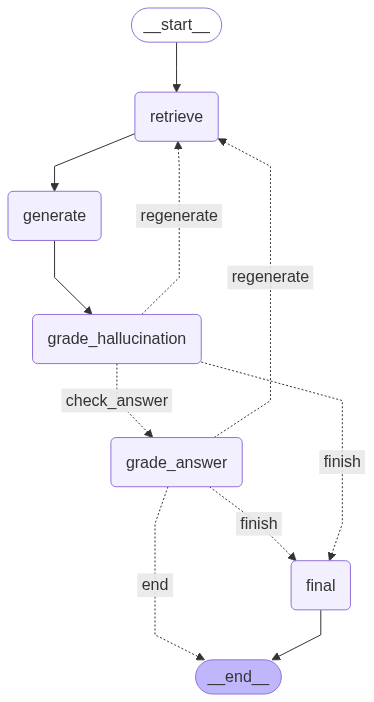

0

In [80]:
gpu_tutor(visualize=True)